In [1]:
import cvxpy as cp
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from Strategy import *

In [3]:
data20 = np.load('data20.npy')
data10 = np.load('data10.npy')
data5 = np.load('data5.npy')

In [4]:
data = np.concatenate([data20, data10, data5], axis=0)

In [12]:
data = data[:,:data.shape[1]-1]
data

array([[6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        1.07767063e+05, 1.10749903e+05, 1.11274843e+05],
       [6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        1.20381456e+05, 1.22130846e+05, 1.22429776e+05],
       [6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        1.40499966e+05, 1.42535526e+05, 1.42700206e+05],
       ...,
       [6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        5.41904863e+04, 5.58415063e+04, 5.52575563e+04],
       [6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        3.87927215e+06, 3.86800070e+06, 3.84862947e+06],
       [6.00000000e+04, 6.00000000e+04, 6.00000000e+04, ...,
        1.18591905e+08, 1.15678633e+08, 1.13549370e+08]])

# Factor analysis on subdata

In [92]:
sub_data = data[[11,17,23,41,47,35,65,71],:]

In [93]:
sub_data.shape

(8, 3935)

In [94]:
chi_sq, p_val = calculate_bartlett_sphericity(sub_data.T)
chi_sq, p_val

(81225.70182814091, 0.0)

In [95]:
kmo_all, kmo_mod = calculate_kmo(sub_data.T)
kmo_mod

0.8566057553814327

In [96]:
fa = FactorAnalyzer(rotation=None)
fa.fit(sub_data.T)
# extract eigenvalues
ev, v = fa.get_eigenvalues()

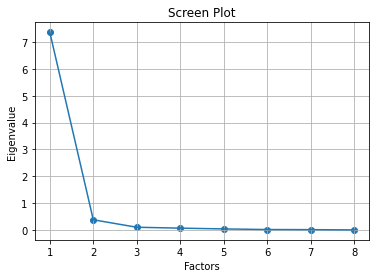

In [98]:
plt.scatter(range(1, sub_data.shape[0] + 1), ev)
plt.plot(range(1, sub_data.shape[0] + 1), ev)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

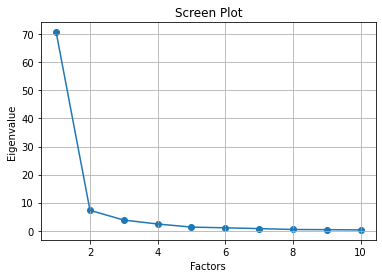

In [84]:
plt.scatter(range(1, 11), ev[:10])
plt.plot(range(1, 11), ev[:10])
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [99]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(sub_data.T)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [100]:
fa.get_factor_variance()

(array([4.26245634, 3.40838923, 0.07259503]),
 array([0.53280704, 0.42604865, 0.00907438]),
 array([0.53280704, 0.9588557 , 0.96793007]))

In [101]:
fa.loadings_

array([[ 0.83146908,  0.50207915,  0.12906084],
       [ 0.8071472 ,  0.52124754, -0.12066922],
       [ 0.56976631,  0.78520179,  0.04799734],
       [ 0.88135209,  0.46581274,  0.0141547 ],
       [ 0.83173006,  0.54924887, -0.01130033],
       [ 0.46915428,  0.8726214 , -0.00364549],
       [ 0.77952658,  0.59125061,  0.19244183],
       [ 0.5465084 ,  0.79897665,  0.04121073]])

# PCA on subdata

In [102]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=2)
pca.fit(sub_data.T)

PCA(n_components=2)

In [110]:
pca.explained_variance_ratio_

array([0.97236596, 0.02140505])

In [113]:
pca.components_.T

array([[ 0.04286164, -0.03746212],
       [ 0.0104697 , -0.0066024 ],
       [ 0.07352982,  0.04459015],
       [ 0.03107882, -0.01202248],
       [ 0.05805175, -0.0387623 ],
       [ 0.61369457,  0.78532945],
       [ 0.14313153, -0.10565957],
       [ 0.76889731, -0.60581463]])

# Looking at the history of portfolio movements

In [74]:
i = 75

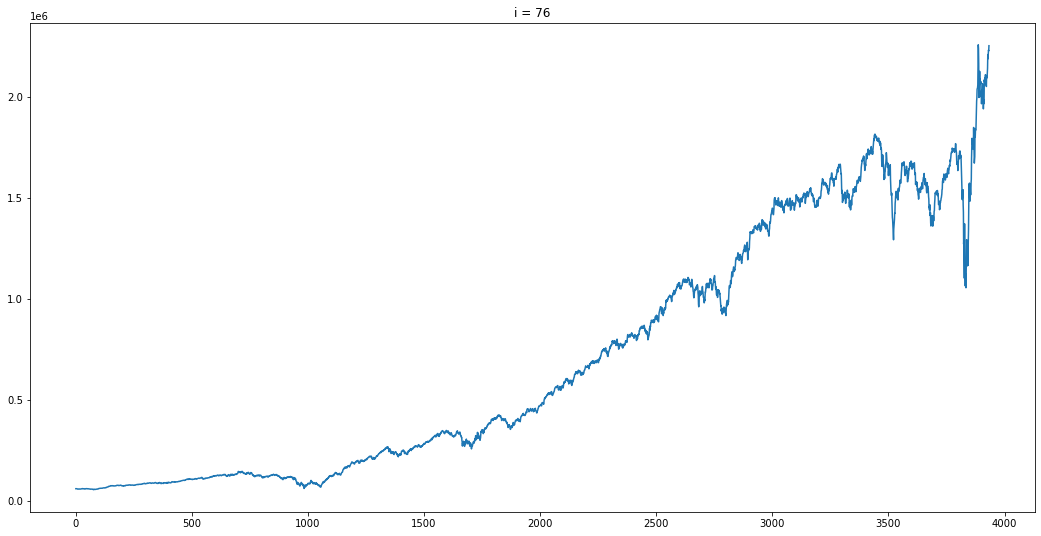

In [76]:
arr = data[i,:data.shape[1]-1]
fig = plt.figure(figsize=(18,9))
plt.title("i = %s" % i)
plt.plot(arr)
plt.show()
i += 1

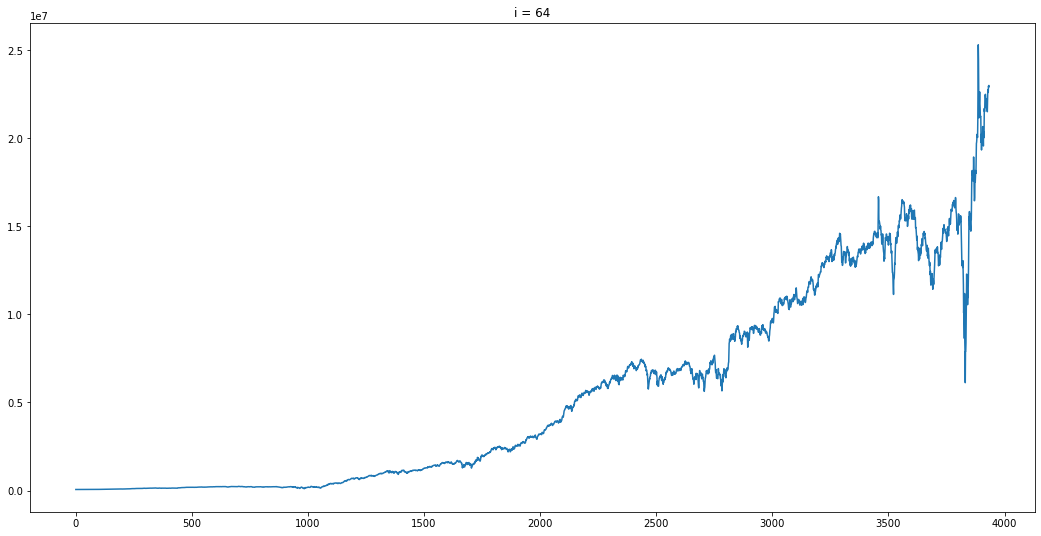

In [69]:
arr = data[i,:data.shape[1]-1]
fig = plt.figure(figsize=(18,9))
plt.title("i = %s" % i)
plt.plot(arr)
plt.show()
i += 1

In [16]:
arr[-1]

20103.516327899997

# Attempts on High-Dimensional optimization

In [57]:
cost = data[:,-1]
cost = cost.reshape(1,-1)

In [58]:
A = data[:,:data.shape[1]-1]

In [59]:
A_ret = np.apply_along_axis(lambda x: np.diff(x) / x[1:], 1, A)
A_ret.shape

(3, 3935)

In [60]:
n = data.shape[0]
w = cp.Variable(n)

In [61]:
w.shape

(3,)

In [64]:
def object_fn(A, cost, w):
    P = A.T @ w
    b = cost @ w
    ret = cp.geo_mean(P, max_denom=A.shape[1])
    return -ret
    '''
    an_ret = cp.power(cp.power(ttl_ret, 1 / P.shape[0]), 252) - 1
    ret_arr = cp.diff(P) / P[1:]
    ret_mu = cp.sum(ret_arr) / (P.shape[0] - 1)
    an_vol = cp.sum_squares(ret_arr - ret_mu) / (P.shape[0] - 1)
    an_sharpe = an_ret / an_vol
    '''

In [ ]:
ttl_ret = (P[-1] - b) / P[0]
an_ret = cp.power(cp.power(ttl_ret, 1 / P.shape[0]), 252) - 1
ret_arr = cp.diff(P) / P[1:]
ret_mu = cp.sum(ret_arr) / (P.shape[0] - 1)
an_vol = cp.sum_squares(ret - ret_mu) / (P.shape[0] - 1)
an_sharpe = an_ret / an_vol

In [65]:
objective = cp.Minimize(object_fn(A_ret, cost, w))
constraint = [cp.sum(w) == 1, w <= 0.9, w >= -0.9]

problem = cp.Problem(objective, constraint)

KeyboardInterrupt: 

In [45]:
problem.solve()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
([[6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 ...
 [1.10749903e+05 1.22130846e+05 1.42535526e+05 ... 5.58415063e+04
  3.86800070e+06 1.15678633e+08]
 [1.11274843e+05 1.22429776e+05 1.42700206e+05 ... 5.52575563e+04
  3.84862947e+06 1.13549370e+08]
 [1.10066123e+05 1.21862706e+05 1.42244706e+05 ... 5.47225663e+04
  3.80970109e+06 1.10436870e+08]] @ var0[1:3936] + -[[6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 ...
 [1.10749903e+05 1.22130846e+05 1.42535526e+05 ... 5.58415063e+04
  3.86800070e+06 1.15678633e+08]
 [1.11274843e+05 1.22429776e+05 1.42700206e+05 ... 5.52575563e+04
  3.84862947e+06 1.13549370e+08]
 [1.10066123e+05 1.21862706e+05 1.42244706e+05 ... 5.47225663e+04
  3.80970109e+06 1.10436870e+08]] @ var0[0:3935]) / [[6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 [6.00000000e+04 6.00000000e+04 6.00000000e+04 ... 6.00000000e+04
  6.00000000e+04 6.00000000e+04]
 ...
 [1.10749903e+05 1.22130846e+05 1.42535526e+05 ... 5.58415063e+04
  3.86800070e+06 1.15678633e+08]
 [1.11274843e+05 1.22429776e+05 1.42700206e+05 ... 5.52575563e+04
  3.84862947e+06 1.13549370e+08]
 [1.10066123e+05 1.21862706e+05 1.42244706e+05 ... 5.47225663e+04
  3.80970109e+06 1.10436870e+08]] @ var0[1:3936]

# Exhaustive Search in $10^3$ for best sharpe ratio

In [138]:
weight = np.linspace(0, 1, 11)

for w in weight:
    for j in weight:
        k = 1 - w - j
        if w == j:
            w += 0.05
            j -= 0.05
        if j == k:
            j += 0.05
            k -= 0.05
        if k == w:
            k += 0.05
            w -= 0.05
        if (k < 0) or (w < 0) or (j < 0):
            continue
        print([w,j,k])


[0.05, 0.1, 0.85]
[0.05, 0.2, 0.75]
[0.05, 0.30000000000000004, 0.6499999999999999]
[0.05, 0.4, 0.5499999999999999]
[0.05, 0.5, 0.44999999999999996]
[0.05, 0.6000000000000001, 0.34999999999999987]
[0.05, 0.7000000000000001, 0.2499999999999999]
[0.05, 0.8, 0.1499999999999999]
[0.05, 0.9, 0.04999999999999993]
[0.1, 0.0, 0.9]
[0.15000000000000002, 0.05, 0.8]
[0.15000000000000002, 0.2, 0.6499999999999999]
[0.15000000000000002, 0.30000000000000004, 0.5499999999999999]
[0.15000000000000002, 0.4, 0.44999999999999996]
[0.15000000000000002, 0.5, 0.35]
[0.15000000000000002, 0.6000000000000001, 0.2499999999999999]
[0.15000000000000002, 0.7000000000000001, 0.1499999999999999]
[0.15000000000000002, 0.8, 0.04999999999999993]
[0.2, 0.0, 0.8]
[0.2, 0.1, 0.7000000000000001]
[0.25, 0.15000000000000002, 0.6000000000000001]
[0.25, 0.30000000000000004, 0.44999999999999996]
[0.25, 0.4, 0.35]
[0.2, 0.5, 0.3]
[0.2, 0.6000000000000001, 0.19999999999999996]
[0.2, 0.7000000000000001, 0.09999999999999998]
[0.2, 0

In [132]:
df = pd.DataFrame(columns=['w', 'j', 'k', 'ret', 'vol', 'sharpe'])

In [133]:
df = df.append({'w':0, 'j':0, 'k':0, 'ret':0, 'vol':0, 'sharpe':0}, ignore_index=True)

In [135]:
df

,w,j,k,ret,vol,sharpe
0,0,0,0,0,0,0
